            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2018-03-01     40.0     53.0     47.0      642    1828
2018-03-02     40.0     54.0     47.0      641    1828
2018-03-03     40.0     52.0     46.0      640    1828
2018-03-04     38.0     54.0     46.0      640    1829
2018-03-05     34.0     46.0     40.0      639    1829


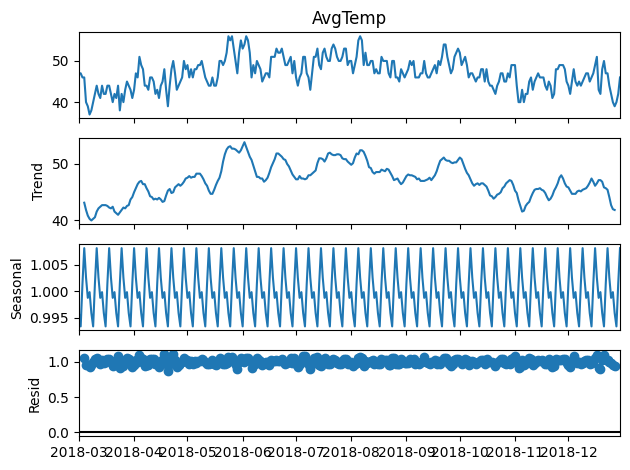

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
  
# Read the MaunaLoaDailyTemps dataset 
df = pd.read_csv('arima_data.csv', 
                       index_col ='DATE', 
                       parse_dates = True) 

# Handle missing values by forward fill
df['AvgTemp'].fillna(method='ffill', inplace=True)

# Print the first five rows of the dataset 
print(df.head()) 
  
# ETS Decomposition 
result = seasonal_decompose(df['AvgTemp'],  
                            model ='multiplicative') 
  
# ETS plot  
result.plot()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df['AvgTemp'])

# Extract and print results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpret results
if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

ADF Statistic: -3.5495945377987614
p-value: 0.006801097110284753
Critical Values:
   1%: -3.4523371197407404
   5%: -2.871222860740741
   10%: -2.571929211111111
The series is stationary.


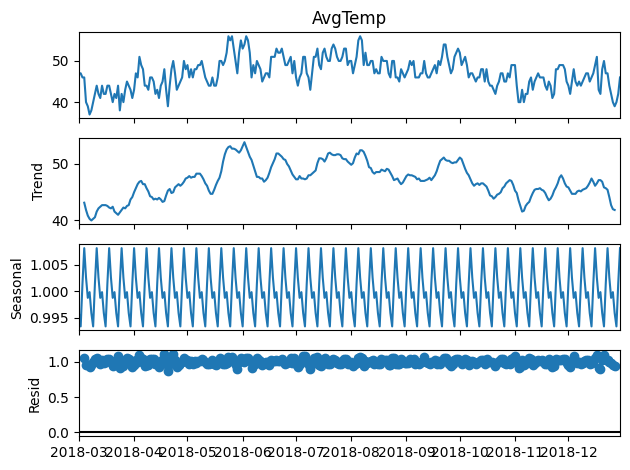

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame containing the time series data
result = seasonal_decompose(df['AvgTemp'], model='multiplicative')

# Plotting the decomposed components
result.plot()
plt.show()


In [9]:
from pmdarima import auto_arima
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df['AvgTemp'], m=12, seasonal=True, 
                          d=None, D=1, trace=True, 
                          error_action='ignore', suppress_warnings=True, 
                          stepwise=True)

stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1348.154, Time=3.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1663.905, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1390.596, Time=0.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1436.401, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1661.978, Time=0.04 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1346.511, Time=2.18 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1468.331, Time=0.44 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1348.270, Time=6.71 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1385.799, Time=2.00 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1349.883, Time=7.27 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1347.846, Time=1.18 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1347.904, Time=1.79 sec
 ARIMA(3,0,2)(0,1,1)[12] intercept   : AIC=1340.510, Time=4.24 sec
 ARIMA(3,0,2)(0,1,0)[12] intercept   : AIC=1449.723, Time=1.31 sec
 ARIMA(3,0,2)(1,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  305
Model:             SARIMAX(3, 0, 2)x(0, 1, [1], 12)   Log Likelihood                -661.162
Date:                              Tue, 30 Apr 2024   AIC                           1336.324
Time:                                      01:13:30   BIC                           1362.085
Sample:                                  03-01-2018   HQIC                          1346.641
                                       - 12-30-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.2619      0.059     38.265      0.000       2.146       2.378
ar.L2         -2.1001      0.095    -22.131      0.000      -2.286      -1.914
ar.L3          0.7672      0.050     15.456      0.000       0.670       0.864
ma.L1         -1.4833      0.058    -25.546      0.000      -1.597      -1.369
ma.L2          0.8943      0.055     16.274      0.000       0.787       1.002
ma.S.L12      -0.8571      0.049    -17.542      0.000      -0.953      -0.761
sigma2         5.0226      0.466     10.771      0.000       4.109       5.937
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.73   Prob(JB):                         0.77
Heteroskedasticity (H):               0.83   Skew:                            -0.03
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

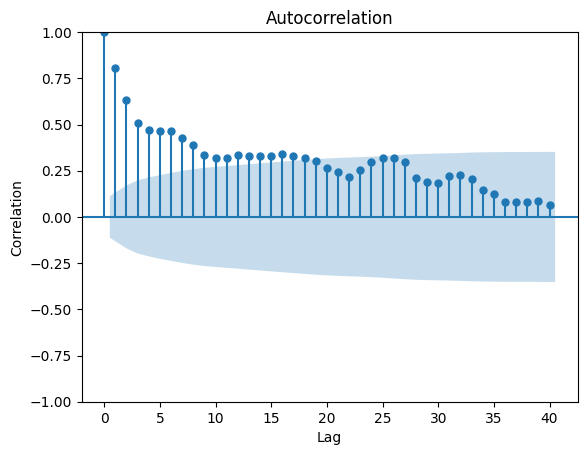

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plot_acf(df['AvgTemp'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

In [16]:
# Split data into train / test sets 
# train = df.iloc[:len(df)-12] 
# test = df.iloc[len(df)-12:] # set one year(12 DATEs) for testing 

# Calculate the length of the dataset
total_length = len(df)

# Calculate the index to split the data
split_index = int(0.8 * total_length)

# Split data into train / test sets 
train = df.iloc[:split_index] 
test = df.iloc[split_index:]
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['AvgTemp'],  
                order = (4,0,3),  
                seasonal_order =(2, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             AvgTemp   No. Observations:                  244
Model:             SARIMAX(4, 0, 3)x(2, 1, [], 12)   Log Likelihood                -529.014
Date:                             Tue, 30 Apr 2024   AIC                           1078.028
Time:                                     01:14:15   BIC                           1112.495
Sample:                                 03-01-2018   HQIC                          1091.928
                                      - 10-30-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.162      5.702      0.000       0.606       1.242
ar.L2          0.0340      0.186      0.183      0.855      -0.330       0.398
ar.L3         -0.7332      0.210     -3.491      0.000      -1.145      -0.322
ar.L4          0.5455      0.125      4.355      0.000       0.300       0.791
ma.L1         -0.1503      0.182     -0.828      0.408      -0.506       0.206
ma.L2         -0.1398      0.173     -0.808      0.419      -0.479       0.199
ma.L3          0.3749      0.191      1.966      0.049       0.001       0.749
ar.S.L12      -0.6697      0.075     -8.914      0.000      -0.817      -0.522
ar.S.L24      -0.1920      0.072     -2.662      0.008      -0.333      -0.051
sigma2         5.4560      0.591      9.225      0.000       4.297       6.615
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.96   Prob(JB):                         0.12
Heteroskedasticity (H):               0.62   Skew:                             0.25
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

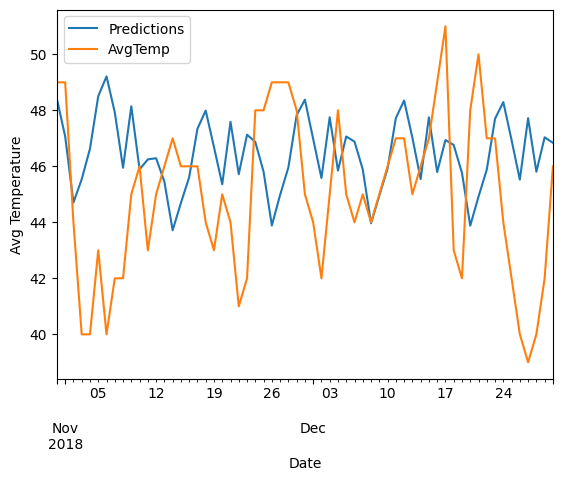

In [17]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['AvgTemp'].plot(legend = True) 
plt.xlabel('Date')
plt.ylabel('Avg Temperature')

plt.show()

In [18]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test["AvgTemp"], predictions) 
  

3.6336946066475395

<Axes: xlabel='DATE'>

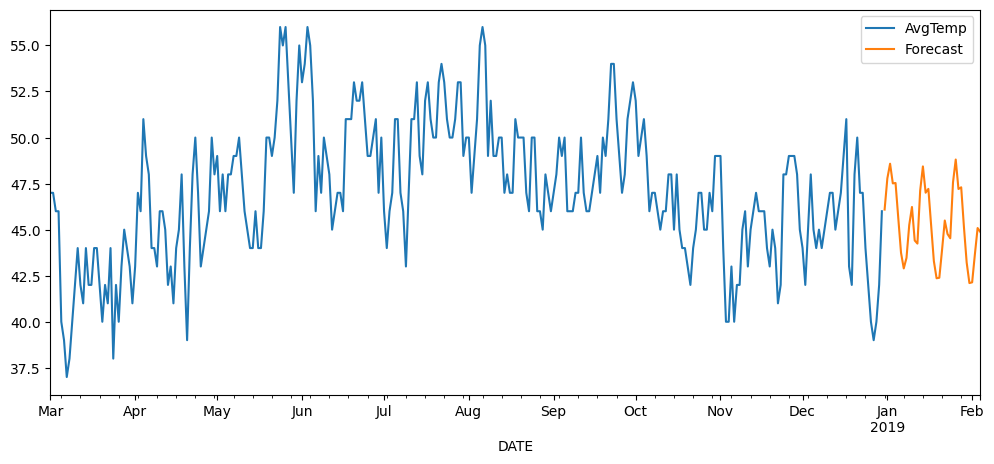

In [20]:
# Train the model on the full dataset 
model = model = SARIMAX(df['AvgTemp'],  
                        order = (2, 0, 0),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['AvgTemp'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 